# tensorflow import

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# list -> tensor
tf.constant([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [4]:
# tuple -> tensor
tf.constant((1, 2, 3))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [5]:
# ndarray -> tensor
arr = np.array([1, 2, 3])
tf.constant(arr)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

# Tensor 정보 확인하기
- shape
- dtype

In [6]:
tensor = tf.constant(np.array([1, 2, 3]))
tensor.shape

TensorShape([3])

In [7]:
tensor.dtype  # 데이터 타입 확인

tf.int64

In [8]:
# 위와 같은 경우에 int32 또는 int64가 나옴

In [9]:
tensor = tf.constant(1, 2.0, 3)
tensor.dtype

tf.float64

In [10]:
# 실수
# 리스트 안 쪽에 있는 데이터타입 중 큰 것을 기준으로 데이터 타입이 결정됨

In [11]:
# 텐서를 만들 때 데이터타입 지정해주기
tensor = tf.constant([1, 2, 3], dtype=tf.float32)  # 1 rank tensor
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

# Tensor의 타입 변경
- cast
- numpy

In [16]:
# 텐서의 타입 변경하기
tf.cast(tensor, tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

In [17]:
# 실수형 -> 정수형으로 변경되었다.

In [18]:
# 텐서를 numpy 배열화 하기
tensor.numpy()  # 방법 1

array([1., 2., 3.], dtype=float32)

In [19]:
np.array(tensor)  # 방법 2

array([1., 2., 3.], dtype=float32)

# Tensorflow의 난수 생성

In [20]:
# numpy로 정규분포 만들기
np.random.randn(9)

array([-0.35725012, -0.59030867,  1.136764  ,  0.8511538 ,  0.46710844,
        0.02917202, -0.62376705,  1.98341019,  0.68056727])

In [21]:
# tensorflow로 정규분포 만들기
tf.random.normal((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.5488012 , -1.9156795 , -1.0292772 ],
       [-0.63813734, -0.10653781,  0.9023055 ],
       [-0.35126564,  0.8830816 ,  0.2185093 ]], dtype=float32)>

In [22]:
# tensorflow로 균등분포 만들기
tf.random.uniform((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.8132688 , 0.80298173, 0.12376499],
       [0.281088  , 0.54437935, 0.7539507 ],
       [0.45993984, 0.67814815, 0.87618625]], dtype=float32)>

# Tensor 형상 관리

In [23]:
# MNIST 데이터 사용
from tensorflow.keras.datasets import mnist

In [24]:
(X_train, y_train), (X_Test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
image = X_train[0]
image.shape

(28, 28)

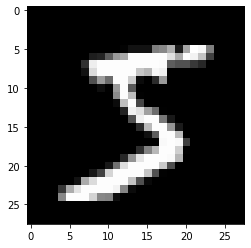

In [27]:
# matplotlib으로 이미지 시각화를 할 때 grayscale이면 채널 데이터가 필요 X
# RGB면 채널 데이터 필요 O

# MNIST 데이터는 RGB가 아닌 grayscale 데이터
plt.imshow(image, "gray")
plt.show()

In [28]:
# CNN 훈련시에는 채널 데이터가 필요하다.
X_train.shape

(60000, 28, 28)

In [30]:
# 훈련 데이터가 없다.

# 채널 데이터 만들어 줘야함.

# 방법1. newaxis
# 방법2. reshape

In [31]:
X_train[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [33]:
X_train.reshape((60000, 28, 28, 1)).shape

(60000, 28, 28, 1)

In [35]:
X_train_reshaped = X_train[..., tf.newaxis]
X_train_reshaped.shape

(60000, 28, 28, 1)

In [36]:
# 원본 이미지로 복구
disp = X_train_reshaped[0, :, :, 0]
disp.shape

(28, 28)

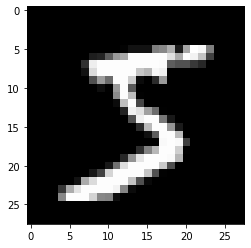

In [38]:
plt.imshow(disp, "gray")
plt.show()

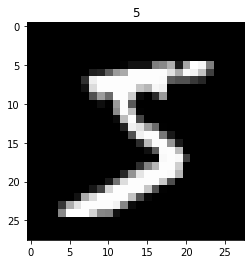

In [40]:
plt.imshow(X_train_reshaped[0, ..., 0], "gray")
plt.title(y_train[0])
plt.show()

# One Hot Encoding

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
to_categorical(1, 5)

array([0., 1., 0., 0., 0.], dtype=float32)

In [43]:
label = y_train[0]
label

5

In [44]:
label_onehot = to_categorical(label, num_classes=10)  # 0~9까지니까 10개
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
# tensor는 tensorflow의 계산그래프를 사용 -> 그래서 딥러닝 계산이 빠름

# constant : 바뀌지 않는 배열 -> 입력값에 사용
# variable : 바뀌는 배열 -> 가중치, 편향에서 사용